<a href="https://colab.research.google.com/github/taskger/project_se/blob/main/tast6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/bottle/Bottle_Detection.zip

Archive:  /content/drive/MyDrive/bottle/Bottle_Detection.zip
   creating: Bottle_Detection/
  inflating: Bottle_Detection/data.yaml  
  inflating: Bottle_Detection/README.dataset.txt  
  inflating: Bottle_Detection/README.roboflow.txt  
   creating: Bottle_Detection/test/
   creating: Bottle_Detection/test/images/
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_10_jpg.rf.1de996166059d885d748f5ed6583e9cd.jpg  
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_10_jpg.rf.d3a322065df03fbf281e4337e6524b1d.jpg  
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_11_jpg.rf.ee3d36798199784a5de517c5ca0480c6.jpg  
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_12_jpg.rf.91b185b327194f05e1381866a23531b6.jpg  
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_13_jpg.rf.ca9c38eee5afc1f2b84353b16fbaedfb.jpg  
  inflating: Bottle_Detection/test/images/LINE_ALBUM_-_-_15_jpg.rf.9ca311feba9722ed4b802070bc7a4718.jpg  
  inflating: Bottle_Detection/test/images/LINE_A

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-270-g4733b4d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data /content/Bottle_Detection/data.yaml --weights yolov5s.pt --cache

2024-01-10 12:51:32.395699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 12:51:32.395788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 12:51:32.397290: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/Bottle_Detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fals

In [6]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/Bottle_Detection/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/Bottle_Detection/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-270-g4733b4d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/Bottle_Detection/test/images/LINE_ALBUM_-_-_10_jpg.rf.1de996166059d885d748f5ed6583e9cd.jpg: 640x640 1 Coca_cola, 1 Sprite, 11.5ms
image 2/20 /content/Bottle_Detection/test/images/LINE_ALBUM_-_-_10_jpg.rf.d3a322065df03fbf281e4337e6524b1d.jpg: 640x640 1 Soft_Drink, 1 Coca_cola,

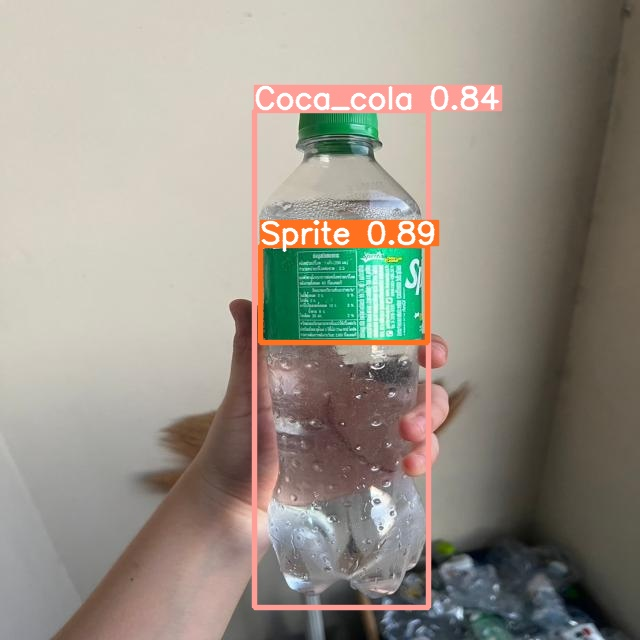

In [8]:
display.Image(filename='/content/yolov5/runs/detect/exp2/LINE_ALBUM_-_-_10_jpg.rf.1de996166059d885d748f5ed6583e9cd.jpg', width=600)